In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/FundamentosCienciaDatos/books_clean.csv')
df.head()

,title,description,category,availability,rating,description_length,price,sentiment_label
0,its only the himalayas,wherever you go whatever you do just dont d...,Travel,19,2,224.0,45.17,positive
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,Travel,15,4,284.0,49.43,positive
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,Travel,14,3,145.0,48.87,positive
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,Travel,8,2,316.0,36.94,positive
4,under the tuscan sun,a classic from the bestselling author of under...,Travel,7,3,166.0,37.33,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         998 non-null    object 
 2   category            1000 non-null   object 
 3   availability        1000 non-null   int64  
 4   rating              1000 non-null   int64  
 5   description_length  1000 non-null   float64
 6   price               1000 non-null   float64
 7   sentiment_label     1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
df["description"] = df["description"].fillna("")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         1000 non-null   object 
 2   category            1000 non-null   object 
 3   availability        1000 non-null   int64  
 4   rating              1000 non-null   int64  
 5   description_length  1000 non-null   float64
 6   price               1000 non-null   float64
 7   sentiment_label     1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


<Axes: xlabel='category', ylabel='count'>

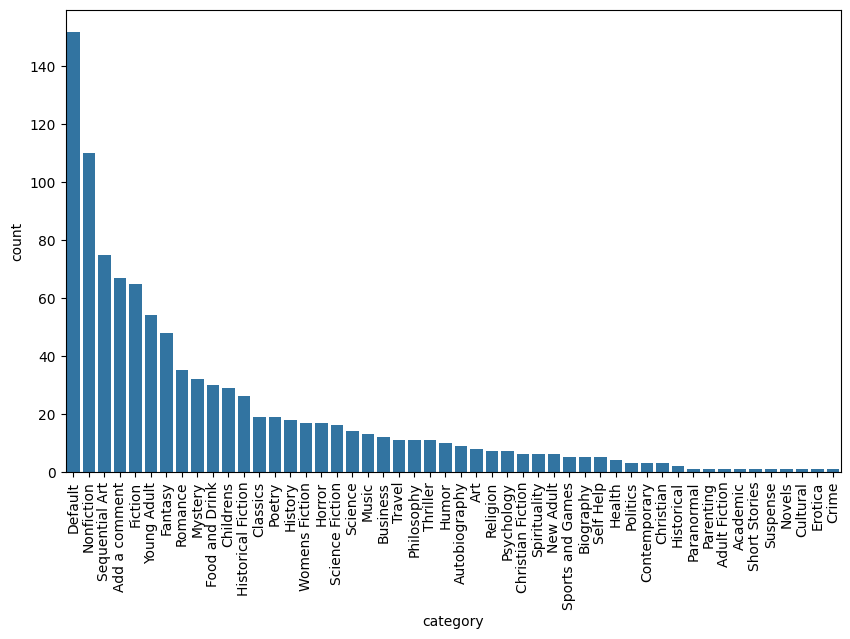

In [ ]:
df_category_counts = pd.DataFrame(df["category"].value_counts())
df_category_counts.sort_values(by = "count")
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

Vemos que hay 2 categorías: Default y Add a comment. Estas dos categorías tienen libros muy variados, puedes encontrar libros como el Secreto, La Brújula Dorada, un libro de Stephen King. Por tanto, le pondremos la categoría que Gemini nos dijo

In [ ]:
df_libros_sin_categoria = df[df["category"].isin(["Default","Add a comment"])]

In [ ]:
df_libros_sin_categoria = df_libros_sin_categoria.drop("category",axis=1)
df_libros_sin_categoria = df_libros_sin_categoria[["title","description"]]
df_libros_sin_categoria.to_csv("libros_sin_categoria.csv", index=False)
files.download('libros_sin_categoria.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_libros_categorizados_gemini = pd.read_excel(r'/content/drive/MyDrive/FundamentosCienciaDatos/libros_categorizados_gemini.xlsx')
df_libros_categorizados_gemini.head()

,title,description,category
0,The Coming Woman: A Novel Based on the Life of...,"""If you have a heart, if you have a soul, Kare...",Historical
1,The Boys in the Boat: Nine Americans and Their...,For readers of Laura Hillenbrand's Seabiscuit ...,Sports and Games
2,"Starving Hearts (Triangular Trade Trilogy, #1)","Since her assault, Miss Annette Chetwynd has b...",Historical
3,America's Cradle of Quarterbacks: Western Penn...,"Any fan of the Baltimore Colts of my era, any ...",Sports and Games
4,Aladdin and His Wonderful Lamp,Planning on seeing Aladdin the Disney musical?...,Childrens


In [ ]:
df_libros_categorizados_gemini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        219 non-null    object
 1   description  218 non-null    object
 2   category     219 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [ ]:
df_libros_categorizados_gemini["description"] = df_libros_categorizados_gemini["description"].fillna("")

In [ ]:
df_libros_categorizados_gemini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        219 non-null    object
 1   description  219 non-null    object
 2   category     219 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [ ]:
df_libros_categorizados_gemini["title"] = df_libros_categorizados_gemini["title"].str.replace(r'[^\w\s]','',regex=True).apply(lambda x: x.lower())

In [ ]:
for row in df_libros_categorizados_gemini.itertuples(index=False):
    df.loc[df["title"].eq(row.title), "category"] = row.category

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         1000 non-null   object 
 2   category            1000 non-null   object 
 3   availability        1000 non-null   int64  
 4   rating              1000 non-null   int64  
 5   description_length  1000 non-null   float64
 6   price               1000 non-null   float64
 7   sentiment_label     1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


<Axes: xlabel='category', ylabel='count'>

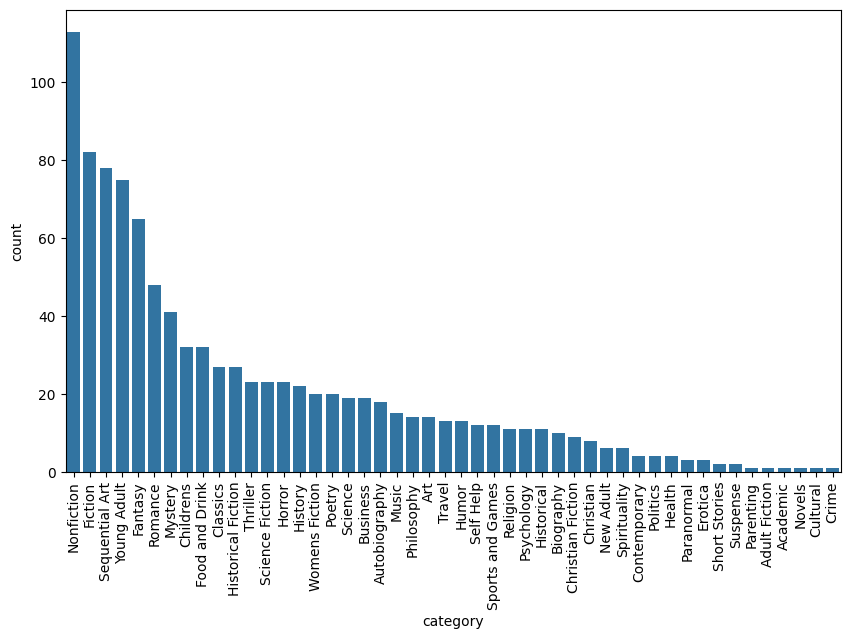

In [ ]:
df_category_counts = pd.DataFrame(df["category"].value_counts())
df_category_counts.sort_values(by = "count")
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

Hay categorías con pocos libros, por lo que conviene crear una agrupación de las categorías.

In [ ]:
category_to_group = {
    # Narrative Fiction
    "Fiction": "Narrative Fiction",
    "Novels": "Narrative Fiction",
    "Short Stories": "Narrative Fiction",
    "Contemporary": "Narrative Fiction",
    "Classics": "Narrative Fiction",
    "Historical Fiction": "Narrative Fiction",
    "Adult Fiction": "Narrative Fiction",
    "Young Adult": "Narrative Fiction",
    "New Adult": "Narrative Fiction",
    "Childrens": "Narrative Fiction",

    # Fantasy & Sci-Fi
    "Fantasy": "Fantasy & Sci-Fi",
    "Science Fiction": "Fantasy & Sci-Fi",
    "Sequential Art": "Fantasy & Sci-Fi",

    # Thriller & Horror
    "Horror": "Thriller & Horror",
    "Paranormal": "Thriller & Horror",
    "Thriller": "Thriller & Horror",
    "Suspense": "Thriller & Horror",
    "Mystery": "Thriller & Horror",
    "Crime": "Thriller & Horror",

    # Romance & Erotica
    "Romance": "Romance & Erotica",
    "Womens Fiction": "Romance & Erotica",
    "Erotica": "Romance & Erotica",

    # Religion & Spirituality
    "Christian Fiction": "Religion & Spirituality",
    "Religion": "Religion & Spirituality",
    "Spirituality": "Religion & Spirituality",
    "Christian": "Religion & Spirituality",

    # Academic & Nonfiction
    "Academic": "Academic & Nonfiction",
    "Science": "Academic & Nonfiction",
    "Psychology": "Academic & Nonfiction",
    "Philosophy": "Academic & Nonfiction",
    "History": "Academic & Nonfiction",
    "Politics": "Academic & Nonfiction",
    "Cultural": "Academic & Nonfiction",
    "Historical": "Academic & Nonfiction",
    "Nonfiction": "Academic & Nonfiction",

    # Biographies & Memoirs
    "Biography": "Biographies & Memoirs",
    "Autobiography": "Biographies & Memoirs",

    # Arts & Humanities
    "Art": "Arts & Humanities",
    "Music": "Arts & Humanities",
    "Poetry": "Arts & Humanities",

    # Lifestyle & Personal Development
    "Food and Drink": "Lifestyle & Personal Development",
    "Travel": "Lifestyle & Personal Development",
    "Self Help": "Lifestyle & Personal Development",
    "Parenting": "Lifestyle & Personal Development",
    "Business": "Lifestyle & Personal Development",
    "Sports and Games": "Lifestyle & Personal Development",
    "Humor": "Lifestyle & Personal Development",
    "Health": "Lifestyle & Personal Development",
}


In [ ]:
df["categoria_agrupada"] = df["category"].map(category_to_group)

<Axes: xlabel='categoria_agrupada', ylabel='count'>

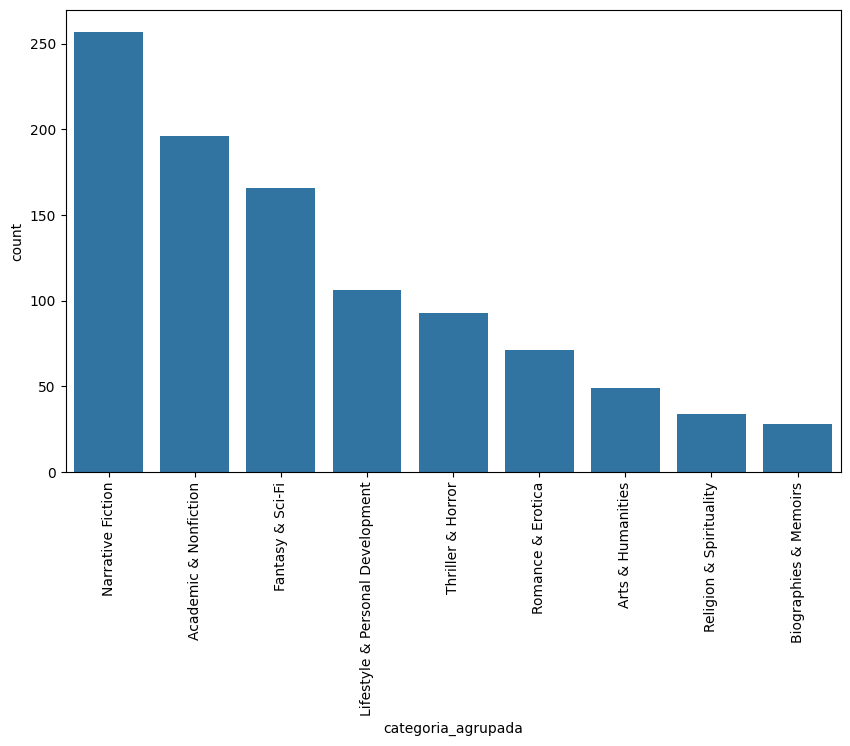

In [ ]:
df_category_counts = pd.DataFrame(df["categoria_agrupada"].value_counts())
df_category_counts.sort_values(by = "count")
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

In [ ]:
df.head()

,title,description,category,availability,rating,description_length,price,sentiment_label,categoria_agrupada
0,its only the himalayas,wherever you go whatever you do just dont d...,Travel,19,2,224.0,45.17,positive,Lifestyle & Personal Development
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,Travel,15,4,284.0,49.43,positive,Lifestyle & Personal Development
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,Travel,14,3,145.0,48.87,positive,Lifestyle & Personal Development
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,Travel,8,2,316.0,36.94,positive,Lifestyle & Personal Development
4,under the tuscan sun,a classic from the bestselling author of under...,Travel,7,3,166.0,37.33,positive,Lifestyle & Personal Development


In [ ]:
df.drop("category",axis=1,inplace=True)

In [ ]:
df.to_csv("books_clean_for_eda.csv", index=False)
files.download('books_clean_for_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>